In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
# this model is going to classify that image has dog or cat
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.6MB/s]
100% 1.06G/1.06G [00:47<00:00, 23.9MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout

In [8]:
'''
Now what we have to do is that from train folder we have to give data to our model, for that we can write custom code for going to that particular folder and checking
each any image and its labels which is very diffult to process such a huge data at once.

keras uses concept to avoid this difulties know as "Generators" :- This generators devide all our data into batches of dataset which is very useful for dealing with
large amount of data.



'''
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

# The images stored here is in the form of numpy array
# and each value of numpy is from 0 to 255 we have to make it from 0 to 1.

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# We have to Nirmalize the data for bringing it from 0- 255 to 0 - 1
def process(image,label):
  image = tf.cast(image/255, tf.float32)# we simply dividing over image value with 255
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# map ()-> Every time it will extract one image and one label from the dataset and it apply process function on it and this fucntion will transform it and return it.



In [10]:
# Creating CNN model now
# we will create 3 layers 1st will contain 32 filters 2nd will contain 64 filters and 3rd will contain 128 filters

model = Sequential()
# Our 1st Convolution layers
model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape=(256,256,3)))

model.add(BatchNormalization())
# we will add pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2,padding = 'valid'))


model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
# we will add pooling layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2,padding = 'valid'))



model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
# we will add pooling layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2,padding = 'valid'))


model.add(Flatten())


# 128-> neurons we are using 3 fully connected models that's why we have to use 3 dense layers
# this is output layer thats why we are going backward
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
# summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

At last we have tensor (30,30,128) on whihc we applied Flattend model on it.


In [12]:
# compile our models
# we will take binary crossentropy becasue this is binary class problem
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [13]:
history = model.fit(train_ds, epochs = 1, validation_data = validation_ds)

625/625 [==============================] - 83s 117ms/step - loss: 1.2445 - accuracy: 0.6025 - val_loss: 0.6663 - val_accuracy: 0.6576


In [ ]:
# we will check training accuracy and validation accuracy graph
# To check how it is performing in this condition
# import matplotlib.pyplot as plt
# plt.plot(history.history['accuracy'], color = 'red', label = 'train')
# plt.plot(history.history['val_accuracy'], color = 'blue',label = 'validation')
# plt.legend()
# plt.show()

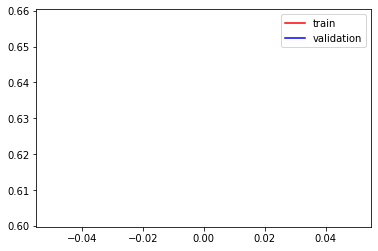

In [14]:
# we will check training accuracy and validation accuracy graph
# To check how it is performing in this condition
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue',label = 'validation')
plt.legend()
plt.show()

From this Graph it is clear that while training the accuracy is increasing but in validation accuracy is around 75% it is not increasing.
Here is problem here is Overfitting

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], color = 'red', label = 'train')
# plt.plot(history.history['val_loss'], color = 'blue',label = 'validation')
# plt.legend()
# plt.show()

In [ ]:
## Ways to reduce overfitting 

# add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity


# For applying bacth normalization we have to "BatchNormalization, Dropout" to improve the accuracy and to fit the model


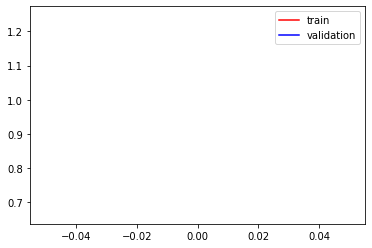

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [16]:
# for testing our image we have ti import open CV 1st
import cv2


In [17]:
test_img = cv2.imread('/content/A-Cat.jpg')

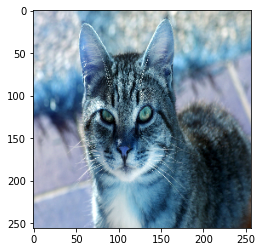

In [34]:
plt.imshow((test_img))

In [19]:
test_img.shape

(2592, 3872, 3)

In [20]:
# we have to resize our image to 256,256,3 
test_img = cv2.resize(test_img, (256,256))


In [22]:
test_input = test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 252ms/step


array([[0.]], dtype=float32)

We got result as 1 means 1 label is given to dog.

In [ ]:
test_img1 = cv2.imread('/content/images.jpeg')

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape

In [ ]:
# we have to resize our image to 256,256,3 
test_img1 = cv2.resize(test_img1, (256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

In [24]:
import pickle
file = open('Image_Classification_Using_CNN.pkl' , 'wb')

In [25]:
pickle.dump(model , file)

Here we have approx 0 values means this is considered as cat

In [26]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 83.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━

In [27]:
import tensorflow as tf

inception_net = tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 2s 0us/step


In [30]:
import requests

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  inp = inp.reshape((1, 256, 256, 3))
  inp = tf.keras.applications.mobilenet_v2.preprocess_input(inp)
  prediction = model.predict(inp).flatten()
  confidences = {labels[i]: float(prediction[i]) for i in range(1000)}
  return confidences

In [32]:
import gradio as gr

gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(224, 224)),
             outputs=gr.Label(num_top_classes=3),
             examples=["/content/A-Cat.jpg"]).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>